<a href="https://colab.research.google.com/github/Aryanupadhyay23/Machine-Learning-/blob/main/Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

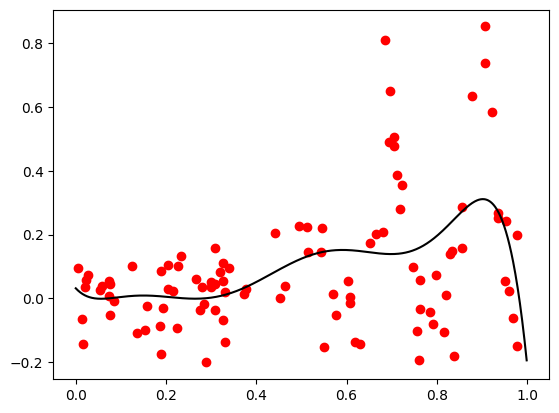

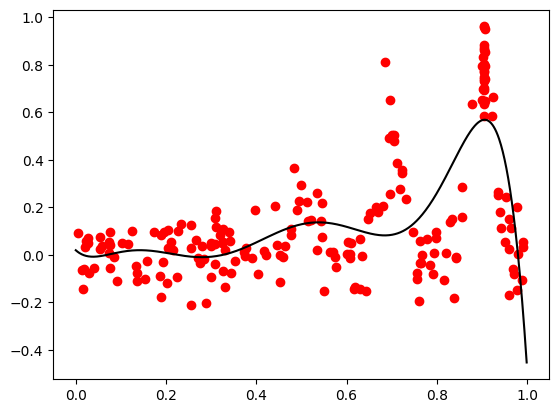

Best Result: x=0.905, y=0.962


/tmp/ipython-input-259035238.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))


In [41]:
# example of bayesian optimization for a 1d function from scratch
import numpy as np
import math
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

# Objective function
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	return model.predict(X, return_std=True)

# optimize the acquisition function
def acquisition(X, model):

	# calculate the acquisition function for each sample
	yhat, _ = surrogate(model, X)
	best = max(yhat)

  # random search, generate random samples
	Xsamples = np.random.random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	# locate the index of the largest scores
	ix = np.argmax(probs)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	plt.scatter(X, y, color='red')
	# line plot of surrogate function across domain
	Xsamples = np.arange(0, 1, 0.001)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	plt.plot(Xsamples, ysamples, color='black')
	# show the plot
	plt.show()

# sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)


# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = acquisition(X, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	# est, _ = surrogate(model, [[x]])
	# add the data to the dataset
	X = np.vstack((X, [[x]]))
	y = np.vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = np.argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [42]:
# Objective function
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

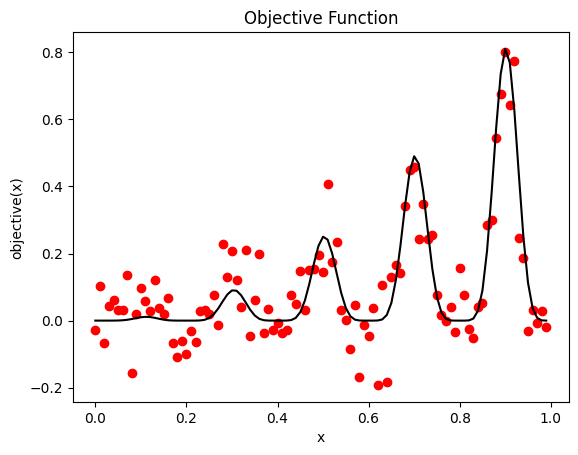

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate data
x_vals = np.arange(0, 1, 0.01)
y_vals = np.array([objective(x) for x in x_vals])

y_actual = np.array([objective(x, noise=0) for x in x_vals])

# Plot the function
plt.scatter(x_vals, y_vals, color='red')
plt.plot(x_vals, y_actual, color='black')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('objective(x)')
plt.show()

In [44]:
x_vals = np.arange(0, 1, 0.01)
x_vals

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [45]:
y_vals = np.array([objective(x) for x in x_vals])
y_vals

array([-3.01058810e-01, -4.01561486e-02,  2.56422203e-02,  9.62855380e-02,
       -1.17988601e-01, -3.82265991e-02,  1.80029887e-01,  3.57545289e-02,
       -7.43190432e-02,  3.64642190e-02, -1.18449347e-01, -2.85587388e-02,
        1.77263858e-01, -2.26737253e-02, -8.13781307e-03, -1.26024539e-01,
        1.72315514e-02, -6.03859336e-02, -9.35393470e-02,  3.03365211e-02,
        1.21848785e-01,  7.56508760e-02, -7.55546778e-02,  1.22969634e-01,
       -8.98675905e-02, -2.41441767e-02,  8.56630836e-02,  1.86516889e-01,
       -1.98927514e-02,  5.41080455e-04,  1.87369264e-01,  5.56810933e-03,
       -2.93156077e-02, -9.30728647e-03, -9.07502723e-02,  1.80464902e-01,
        1.28827676e-01,  7.38818724e-02, -7.10391547e-02, -5.70328338e-02,
        1.43707683e-02, -1.39741898e-01, -6.71174735e-02,  2.72469771e-02,
        7.11153372e-02,  1.27001389e-02,  1.50619210e-01,  1.68734671e-01,
        1.14853629e-01,  2.26448863e-01,  1.27429639e-01,  1.41656407e-01,
        1.78761740e-01,  